# Сборный проект №1 - анализ популярности компьютерных игр

Аналитик - Чертыковцев Даниель

Представлены для анализа данные магазином компьютерных игр "Стримчик"
Данные представляют собой информацию по продаже компьютерных игр до 2016 года.
Заказчик планирует свою работу на 2017 год.
Необходимо:
- проанализирвоать имеющиеся данные,
- составить портрет пользователя каждого региона (пределить для пользователя каждого региона (NA, EU, JP)):
•	Самые популярные платформы (топ-5). Описать различия в долях продаж.
•	Самые популярные жанры (топ-5). Поясните разницу.
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- провериить гипотезы:
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</p>

При анализе требуется руководствоваться полезностью сведений для планирования/прогнозирования на 2017 год.
 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>
    <ul class="toc-item"><li><span><a href="#Вывод-по-анализу-данных" data-toc-modified-id="Вывод по анализу данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по анализу данных</a></span></li></ul></li>
    <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li>
    <ul class="toc-item"><li><span><a href="#Вывод-по-исследовательскому-анализу" data-toc-modified-id="Вывод по исследовательскому анализу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по исследовательскому анализу</a></span></li></ul>
    <li><span><a href="#Составление-портрета-пользователя" data-toc-modified-id="Составление-портрета-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя</a></span></li>
    <ul class="toc-item"><li><span><a href="#Вывод-по-портрету-пользователя" data-toc-modified-id="Вывод по портрету пользователя-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по портрету пользователя</a></span></li></ul>
    <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li>
    <li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li>

# Изучение данных из файла

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</p></p>
<b>Данные за 2016 год могут быть неполными.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('C:/Users/danie/Documents/Практикум/1 часть Python и анализ данных/1 сборный проект/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Вывод по анализу данных

Представленая таблица с данными в целом заполнена. </p>
Очевидно имеются единичные (до 10) пропуски в колонках:</p>
- название, 
- год выпуска, 
- жанр </p>

Также имеются пропуски в колонках, в которых данных действительно может не быть:</p>
- оценка критиков,
- оценка пользователей, 
- рейтинг от организации ESRB.</p>

Учитывая что требуется анализ, целесообразный для планирования на 2017 год, возможно часть данных с пропусками целесообразно исключить из итоговых выводов.


# Предобработка данных

<b>Переименование заголовков.</b> Приведем названия к нижнему регистру.

In [6]:
data.columns = list(map(lambda x: x.lower(), data.columns))

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<b>Изменение типов данных</b></p>
Целесообразно изменение типов данных по следующим столбцам:
- год выпуска игры (year_of_release) преобразовать в integer для упрощения обработки;
- оценка пользователей (user_score) преобразовать во float для возможности обработки/рассчета корреляции


In [8]:
data.loc[data.year_of_release.isna()==False,'year_of_release']=data.loc[data.year_of_release.isna()==False,'year_of_release'].astype('Int64')

In [9]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [10]:
data.user_score.value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

<b>Работа с пропусками</b>

Очевидные пропуски имеются в столбцах:
Name            - 2 пропуска
Year_of_Release - 269 пропусков 
Genre           - 2 пропуска
по данным столбцам отсутствие данных очевидно является ошибкой заведения данных.

Также имеются пропуски по следующим столбцам, по которым отсутствие данных вполне возможно
Critic_Score, User_Score, Rating. 

Посмотрим данные, в т.ч. пропуски по столбцам:

<b>name</b>

In [11]:
data.name.value_counts()

Need for Speed: Most Wanted                                        12
Madden NFL 07                                                       9
Ratatouille                                                         9
FIFA 14                                                             9
LEGO Marvel Super Heroes                                            9
                                                                   ..
Star Trek: Invasion                                                 1
Gegege no Kitarou 2: Youkai Gundan no Chousen                       1
Crayon Shin-Chan: Obaka Daininden - Susume! Kasukabe Ninja Tai!     1
StokEd                                                              1
Allied General                                                      1
Name: name, Length: 11559, dtype: int64

Таблица <i>возможно</i> содержит повторы, посмотрим на примере игры с максимальным количество упоминаний

In [12]:
data[data.name=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Повторы названия связаны с разными годами выпуска и платформой для которой продается версия игры.
Посмотрим есть ли полные дубликаты строк

In [13]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
# look for missed values in 'name'
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<b>platform</b>

In [15]:
data[data.platform=='GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [16]:
#those 2 ones with NaN in 'name' and 'genre' columns could be dropped. There is no way to find out what it was.
data=data.drop(data[data.name.isna()].index)

In [17]:
data.platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

<b>year_of_release</b>

значения были проверены выше, выбросов нет</p>
проверим пустые значения

In [18]:
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Попробуем подставить дату релиза игры по принципу:
1. Если есть несколько релизов с таким же названием и все одного года (очевидно разные платформы), то подставим тот же год. Т.к. в целом игра ассоциируется с одним годом выпуска
2. Если есть только один релиз с таким же названием, и платформа другая. Также подставим тот же год.

In [19]:
for index, row in data[data.year_of_release.isna()].iterrows():
    same_rows_qty= data[(data.name == row['name']) & (data.year_of_release.isna()==False)]
    same_rows_unique_years = data[(data.name == row['name']) & (data.year_of_release.isna()==False)]['year_of_release'].unique()
    try:
        if (len(same_rows_qty)>1 and len(same_rows_unique_years)==1):
            data.loc[index,'year_of_release']=same_rows_unique_years[0]
        elif (len(same_rows_qty)==1 and same_rows_qty.iloc[0,1]!=row['platform']):
            data.loc[index,'year_of_release']=same_rows_unique_years[0]
    except:
        print(same_rows_qty.iloc[0,1])

In [20]:
data[data.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Осталось 158 строк с отсутсвием года релиза игры, который не получается заполнить логически обоснованным значением. Предлагается удалить данные строки:

In [21]:
data=data.dropna(subset = ['year_of_release'])

<b>genre</b>

In [22]:
data.genre.value_counts()

Action          3340
Sports          2330
Misc            1733
Role-Playing    1484
Shooter         1310
Adventure       1294
Racing          1234
Platform         878
Simulation       860
Fighting         841
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [23]:
data[data.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


По столбцу genre пропуски или некорректные значения отсутствуют

<b>sales</b>

по столбцам na_sales, eu_sales, jp_sales, other_sales пропущенные и/или очевидные выбросы в значениях отсутствуют

<b>scores</b>

In [24]:
data.critic_score.value_counts()

70.0    253
71.0    252
75.0    243
78.0    238
80.0    236
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [25]:
data.user_score.value_counts()

tbd    2391
7.8     324
8       287
8.2     279
8.3     253
       ... 
0.3       2
1.9       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

существенная часть значений в колонке user_score представлена значением 'tbd', что можно перевести как [<b>оценка ожидается</b>](https://yandex.ru/turbo/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie 'TBD - что значит это сокращение?') для целей статистики логично данные значения перевести в NaN, т.к. такое значение имеется в т.ч. по достаточно "старым" релизам игр. Это может означать что издателем (иным заинтересованным лицом) не завершен сбор оценок пользователей. Возможно данная работа "заброшена", а значит ожидать результата не стоит. Кроме того исключение строкового значения облегчит статистический анализ "реальных" оценок выраженных числами.

In [26]:
#Посмотрим на какие годы приходятся (по дате релиза) игры со значением user_score - 'tbd'
data[data.user_score=='tbd'].year_of_release.value_counts()

2009.0    405
2010.0    332
2008.0    330
2011.0    218
2007.0    193
2002.0    193
2006.0    127
2005.0    122
2004.0    107
2003.0     96
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     26
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

практически все значения оценки пользователей (user_score) заполненные как 'tbd' приходятся на "старые" релизы - по 2011 год включительно. Данные релизы вероятно будут мало полезны для прогнозирования на 2017 год, требуемого заданием. Таким образом предложение об обнулении данных значений для приведения столбца user_score к значениям Int (+NaN) по-прежнему целесообразно. Заменим 'tbd' на Nan:

In [27]:
data.loc[data.user_score=='tbd','user_score']=np.nan
data['user_score']=data['user_score'].astype(float)

In [28]:
data.user_score.sum()

53689.59999999999

In [29]:
data.rating.value_counts()

E       3954
T       2929
M       1552
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Отмечено 4 значения рейтинга встречающихся в сумме менее 1% от общего числа оценок:
ЕС (early childhood) - для детей от 3х лет. Предлагается заменить на Е - для всей семьи.
К-А (kids to adults) - от детей до взрослых. Предлагается заменить на Е - для всей семьи.
АО (adults only) - только для взрослых. Предлагается заменить на М - для взрослых.
RP (report pending) - отчет ожидается. Предлагается удалить.

In [30]:
data.loc[data.rating=='RP','rating']=np.nan
data.loc[(data.rating=='K-A' )| (data.rating=='EC'), 'rating'] = 'E'
data.loc[data.rating=='AO', 'rating'] = 'M'

In [31]:
data.rating.value_counts()

E       3965
T       2929
M       1553
E10+    1411
Name: rating, dtype: int64

<b>total_sales</b>

Создадим колонку с общим значением продаж по всем регионам 'total_sales' и посчитаем для нее значения:

In [32]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [33]:
data.total_sales.value_counts()

0.02    1017
0.03     798
0.01     789
0.04     651
0.05     639
        ... 
6.95       1
3.84       1
9.30       1
0.52       1
0.85       1
Name: total_sales, Length: 1006, dtype: int64

# Исследовательский анализ данных

Статистика релизов игр по годам:

<AxesSubplot:>

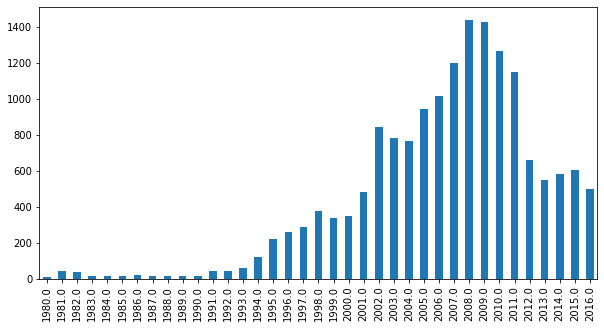

In [34]:
data.year_of_release.value_counts().sort_index().plot(kind='bar',figsize=(10,5))

<AxesSubplot:>

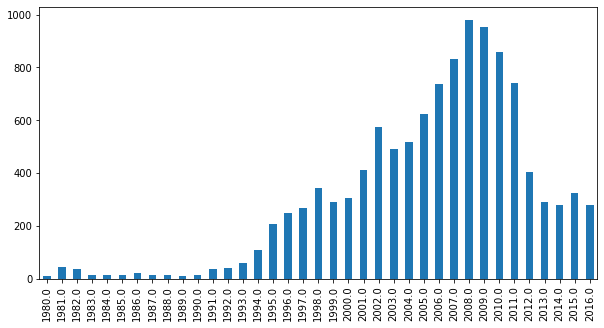

In [35]:
#добавим статистику, сгруппированную по названию игры (независимо от количества платформ будет считаться по одному релизу, 
#год выберем минимальный для данной игры):
(data.groupby('name')['year_of_release'].min()).value_counts().sort_index().plot(kind='bar',figsize=(10,5))

Пик количества релизов приходится на 2008 год как с учетом доп.релизов по платформам, так и в целом по играм.
На 2008 год приходится один из финансовых кризисов приведший в частности к охлаждению рискованного инвестирования, к которому также относится и инвестирование в разработку игр. 
Пик оптимизма у инвесторов пришедшийся на 2007-2008 год, сопровождается значительным, но снижающимся в течение 2009-2011 гг. количества релизов игр, очевидно профинансированных (частично или полностью) до кризиса.
Количество релизов после 2011 года находится на уровне начала 2000х.

Посмотрим количество продаж по релизам в разрезе года релиза:

<AxesSubplot:xlabel='year_of_release'>

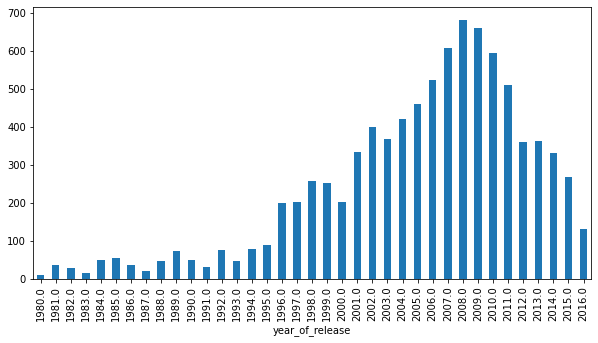

In [36]:
data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',figsize=(10,5))

Продажи игр с релизом до 1996 года в целом незначительны. Предлагается ограничиться данными о продажа игр начиная с 1996 года.
Проверим средний объем продаж по году релиза игр:

<AxesSubplot:xlabel='year_of_release'>

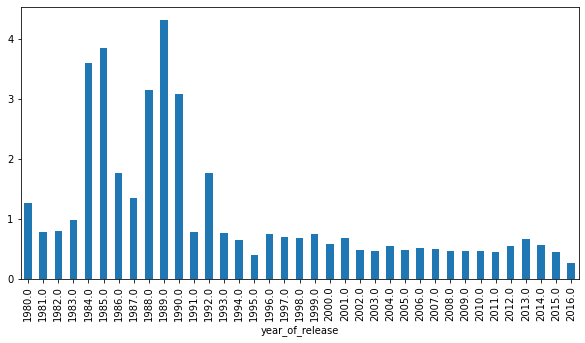

In [37]:
data.groupby('year_of_release')['total_sales'].mean().plot(kind='bar',figsize=(10,5))

По играм с годом релиза до 1996 года, незначительное количество выпускаемых в продажу игр позволило добиться высоких средних продаж. Кроме того возможна обратная зависимость - в продажу в магазине выставляются только те "старые" игры которые заведомо пользуются большим спросом.
При этом выбросы в отдельные года (1984,1985,1988,1989,1990) очевидно связаны с релизом в эти года особенно популярных игр.
Очевидно что максимальные продажи приходятся на первые годы выходы игры. </p>
Однако если предположить равномерное распределение продаж по годам, то годовой объем продаж игр за последний год в разбивке по годам релиза:

In [38]:
#(data.groupby('year_of_release').assign(year_sales=lambda x: sum(x['total_sales']/(2017-x['year_of_release'])))).plot(kind='bar',figsize=(10,5))
by_year_sales = data.groupby('year_of_release').agg({'total_sales':'sum'})
by_year_sales['year_sales'] = by_year_sales['total_sales']/(2017-by_year_sales.index)

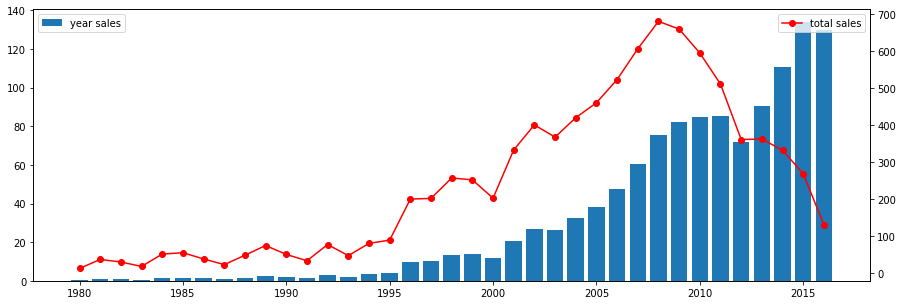

In [39]:
#by_year_sales.plot(kind='bar', y = 'total_sales', figsize=(15,5))
fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(by_year_sales.index,by_year_sales['year_sales'],label = 'year sales')
ax2.plot(by_year_sales.index,by_year_sales['total_sales'],'o-',color='red', label = 'total sales')
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.set_size_inches(15,5)
plt.show()


Мы получили усредненные, отражающие максимально возможные среднегодовые продажи с даты выхода/релиза игры с допущением о равномерной продаже игр в первый и последующие года. При этом очевидно что фактические продажи за последний год меньше полученного "среднего". Рост "средних" продаж очевиден с 2012 года. Предлагается в дальнейшем оставить игры с релизом после 2012 года.

<b>анализ продажи по платформам</b>

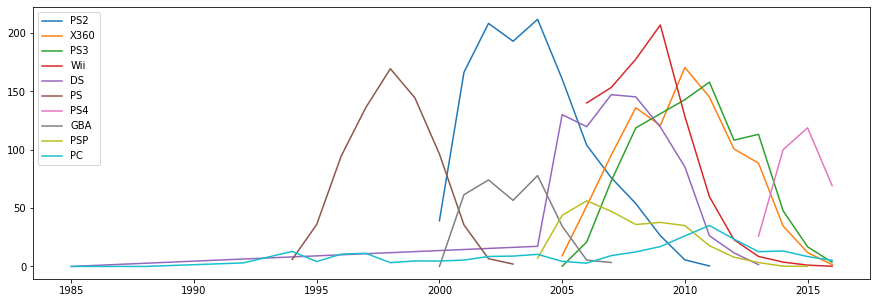

In [40]:
# посмотрим продажи игр в разрезе платформ и годов релиза. Платформы отберем первые 10 по объему продаж.
counter = 0
plt.figure(figsize=(15, 5))
for ind, row in data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().iterrows():
    if ind == 10:
        break
    plt.plot(data[data.platform==row['platform']].groupby('year_of_release').agg({'total_sales':'sum'}),label=row['platform'])
plt.legend(loc=0)
plt.show()

Согласно графика пик продаж приходится на релизы выпущенные на 5й год существования платформы. 
Например PS2 (by Sony) - первый игры появляются на графике в 2000 году, максимум приходится на 2004 год. В 2005 отражается снижение. Из графика выбивается только PS4 (by Sony, розовый график) однако снижение после 2015 года возможно связано с неполными данными за 2016 год.
Сделаем график за ранее установленный значимый для текущего времени период - "после 2012 года"

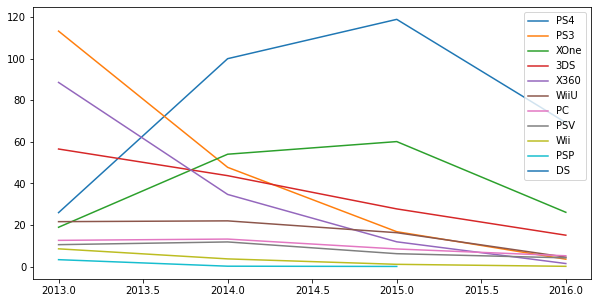

In [41]:
# посмотрим продажи игр в разрезе платформ и годов релиза. Отберем игры с релизом после 2012 года.
counter = 0
plt.figure(figsize=(10, 5))
for ind, row in data[data['year_of_release']>2012].groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().iterrows():
    plt.plot(data[(data.platform==row['platform'])&(data['year_of_release']>2012)].groupby('year_of_release').agg({'total_sales':'sum'}),label=row['platform'])
plt.legend(loc=0)
plt.show()

<b>Вывод по анализу продаж по платформам</b></p>Данные о продажах в разрезе платформ свидетельствуют что максимальные продажи исторически пришлись на платформу PlayStation с первого по 4е поколение, а также в отдельные моменты времени получали популярность платформы от Ninitendo (DS, Wii) и разные верссии платформ от Microsoft (X360, XOne). Жизненный цикл платформ составлял порядка 5-ти лет. После чего выпуск новых игр сходил на нет. </p>
По состоянию на конец 2016 года наибольший потенциал имеется по играм выпущенным на платформах PS4 (by Sony) и XOne (by Microsoft) </p>
При этом платформы X360 и 3DS, а также предыдущая версия PlayStation (PS3) показывают существенное снижение продаж вновь выпускаемых игр.
К платформам со стабильным объемом продаж новых релизов игр относятся настольные компьютеры (PC), WiiU, PSV

Согласно задания предлагается ограничить используемые в анализе данные. Оставим для анализа данные с 2012 года:

In [42]:
#копируем датасет в части релизов с 2012 года в новый
data_actual = data[data['year_of_release']>2012]

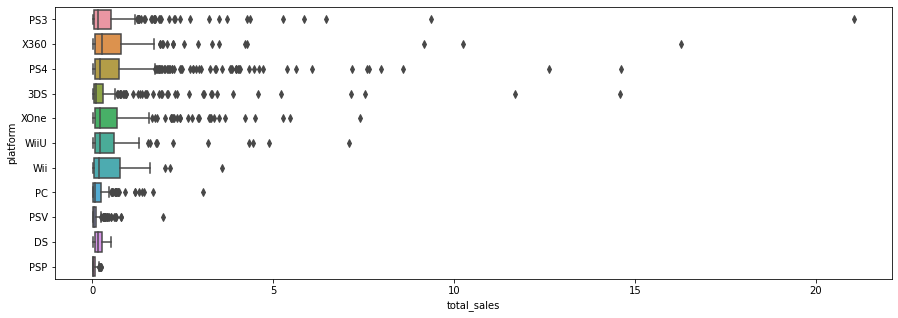

In [43]:
plt.figure(figsize=(15,5))
ax=sns.boxplot(y=data_actual['platform'],x=data_actual['total_sales'])
plt.show()

In [44]:
#Выведем игры с объемом продаж более 5 млн. долл.
data_actual[data_actual.total_sales>5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


[(0.0, 2.0)]

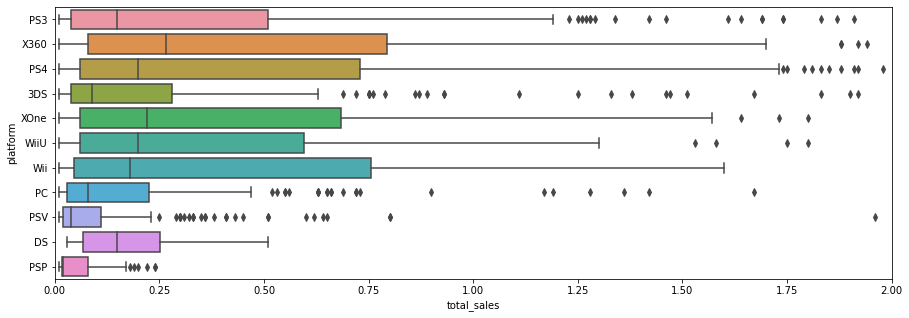

In [45]:
#Посмтроим boxplot,выведем данные только по дипазаону до 2 млн дохода с продаж
plt.figure(figsize=(15,5))
ax=sns.boxplot(y=data_actual['platform'],x=data_actual['total_sales'])
ax.set(xlim=(0,2))

Графики BoxPlot по продажам с 2012 года показывают что в основном выручка от продажи игр находится в диапазоне до 0,1 до 0,75 млн. Определенное количество "выбросов" связано с крайне успешными играми, продажи по которым на порядок превосходят рядовые значения. При этом на платформах х360/xOne, PS4/PS3, Wii/WiiU встречаются наибольшие значения продаж одного релиза игры - Q3 на уровне 0.75 млн., при этом остальные платформы существенно отстают, в т.ч. Q3 на уровне 0,25 млн.).

<b>Анализ корреляции объема продаж и рейтинга игры (пользователи, критики и т.п.)</b>

'Корреляция оценки пользователей и объема продаж игры составила -'

-0.031957110204556424

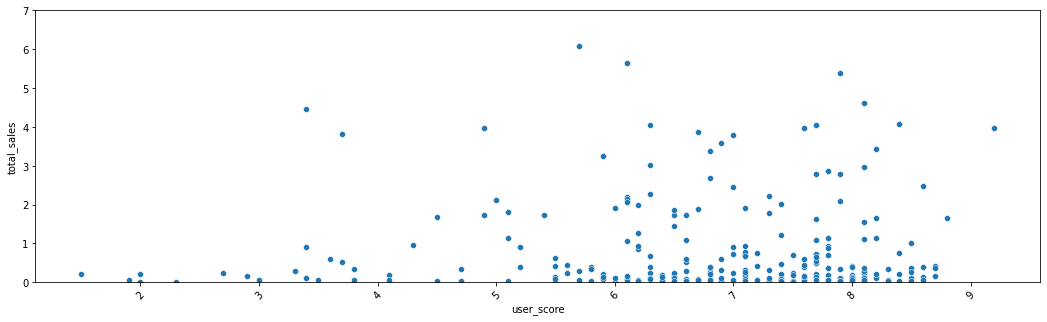

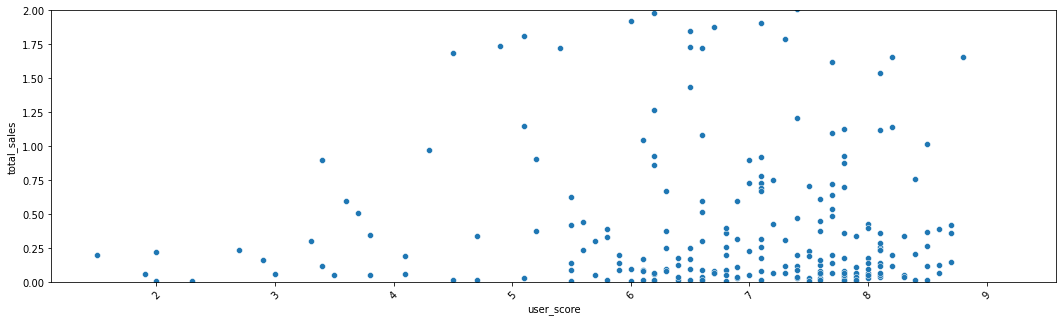

In [46]:
display('Корреляция оценки пользователей и объема продаж игры составила -',data_actual.loc[data_actual.platform=='PS4','user_score'].corr(data_actual.loc[data_actual.platform=='PS4','total_sales']))

plt.figure(figsize=(18,5))
plt.xticks(rotation=45)
ax=sns.scatterplot(data=data_actual[data_actual.platform=='PS4'].sort_values(by='user_score',ascending=True), x = 'user_score',y='total_sales',)
ax.set(ylim=(0,7))
plt.show()
plt.figure(figsize=(18,5))
plt.xticks(rotation=45)
ax=sns.scatterplot(data=data_actual[data_actual.platform=='PS4'].sort_values(by='user_score',ascending=True), x = 'user_score',y='total_sales',)
ax.set(ylim=(0,2))
plt.show()

'Корреляция оценки критиков и объема продаж игры составила -'

0.40656790206178095

[(0.0, 2.0)]

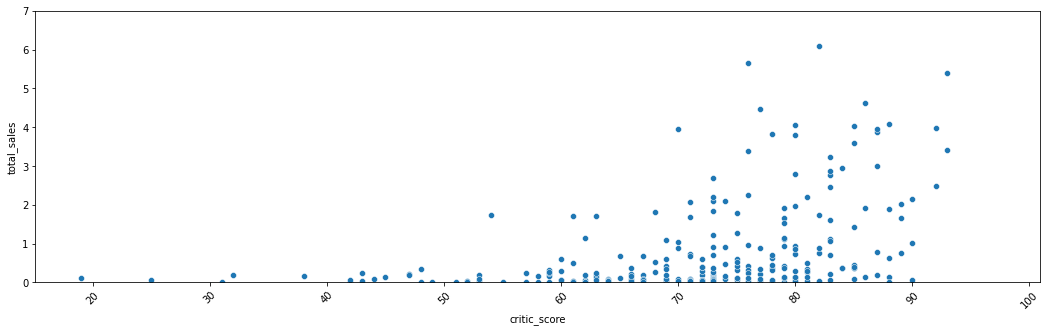

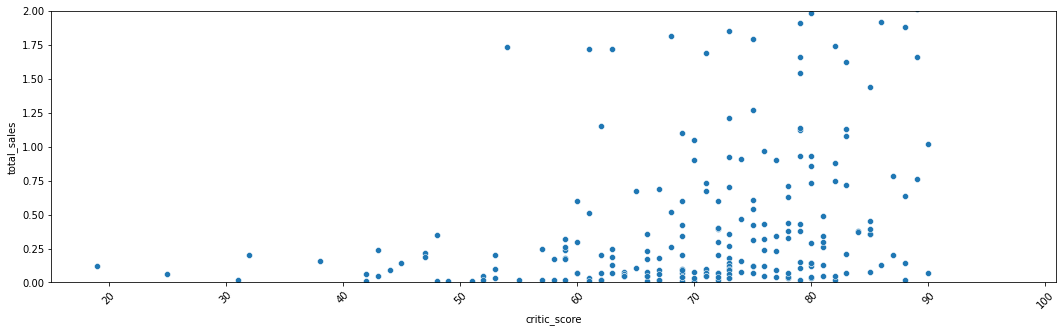

In [47]:
display('Корреляция оценки критиков и объема продаж игры составила -',data_actual.loc[data_actual.platform=='PS4','critic_score'].corr(data_actual.loc[data_actual.platform=='PS4','total_sales']))

plt.figure(figsize=(18,5))
plt.xticks(rotation=45)
ax=sns.scatterplot(data=data_actual[data_actual.platform=='PS4'].sort_values(by='critic_score',ascending=True), x = 'critic_score',y='total_sales',)
ax.set(ylim=(0,7))
plt.figure(figsize=(18,5))
plt.xticks(rotation=45)
ax=sns.scatterplot(data=data_actual[data_actual.platform=='PS4'].sort_values(by='critic_score',ascending=True), x = 'critic_score',y='total_sales',)
ax.set(ylim=(0,2))

Анализ диаграмм рассеяния и коэффициента корреляции показывает, что рейтинг игроков не коррелирует с объемом продаж игр. При этом оценки критиков более показательны - большие продажи встрчаются только при рейтинге более 60. Самые высокие продажи у игр с оценками 70-90 баллов. Корреляция также составила порядка 0,4 что подтверждает наличие зависимости.
Игры с оценкой критиков ниже 70 можно отнести к "неудачным" с точки зрения возможных продаж. Потенциал продаж по таким играм существенно ниже чем по играм с оценкой 70-90 баллов.

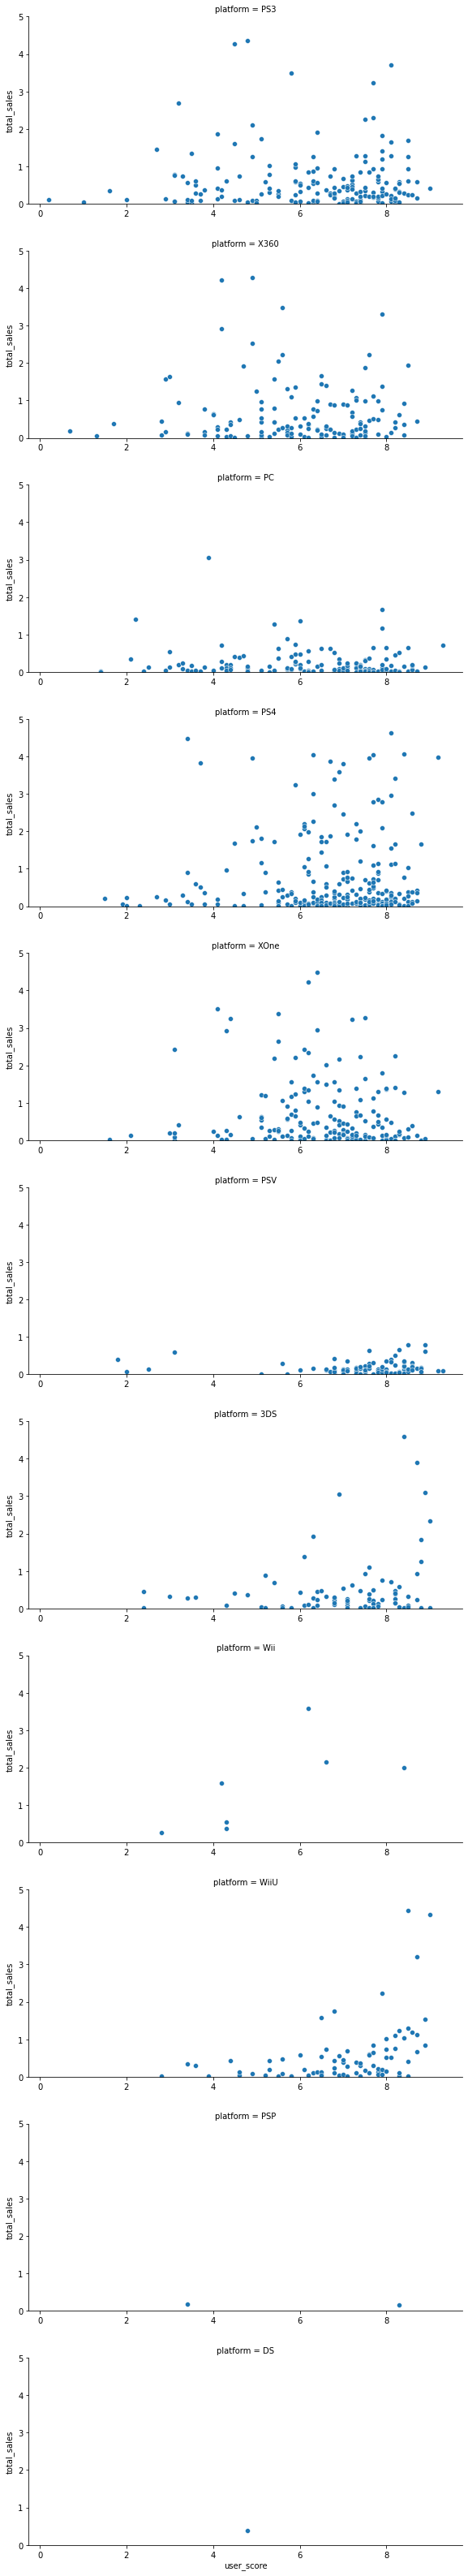

In [48]:
#Посмотрим диаграммы рассеяния по всем платформам по пользовательским оценкам
fg=sns.relplot(data=data_actual[data_actual.user_score.isna()==False].sort_values(by='user_score'),x='user_score',y='total_sales',height=4, aspect=2,row='platform')
fg.set(ylim=(0,5))
plt.subplots_adjust(hspace=0.25) #увеличиваем разрыв между графиками, чтобы не сливались подписи оси Х и заголовки следующего графика
for ax in fg.axes.flatten():
    ax.tick_params(labelbottom=True) #задаем подписи оси Х в каждом графике (по умолчанию выходят подписи только в конце)

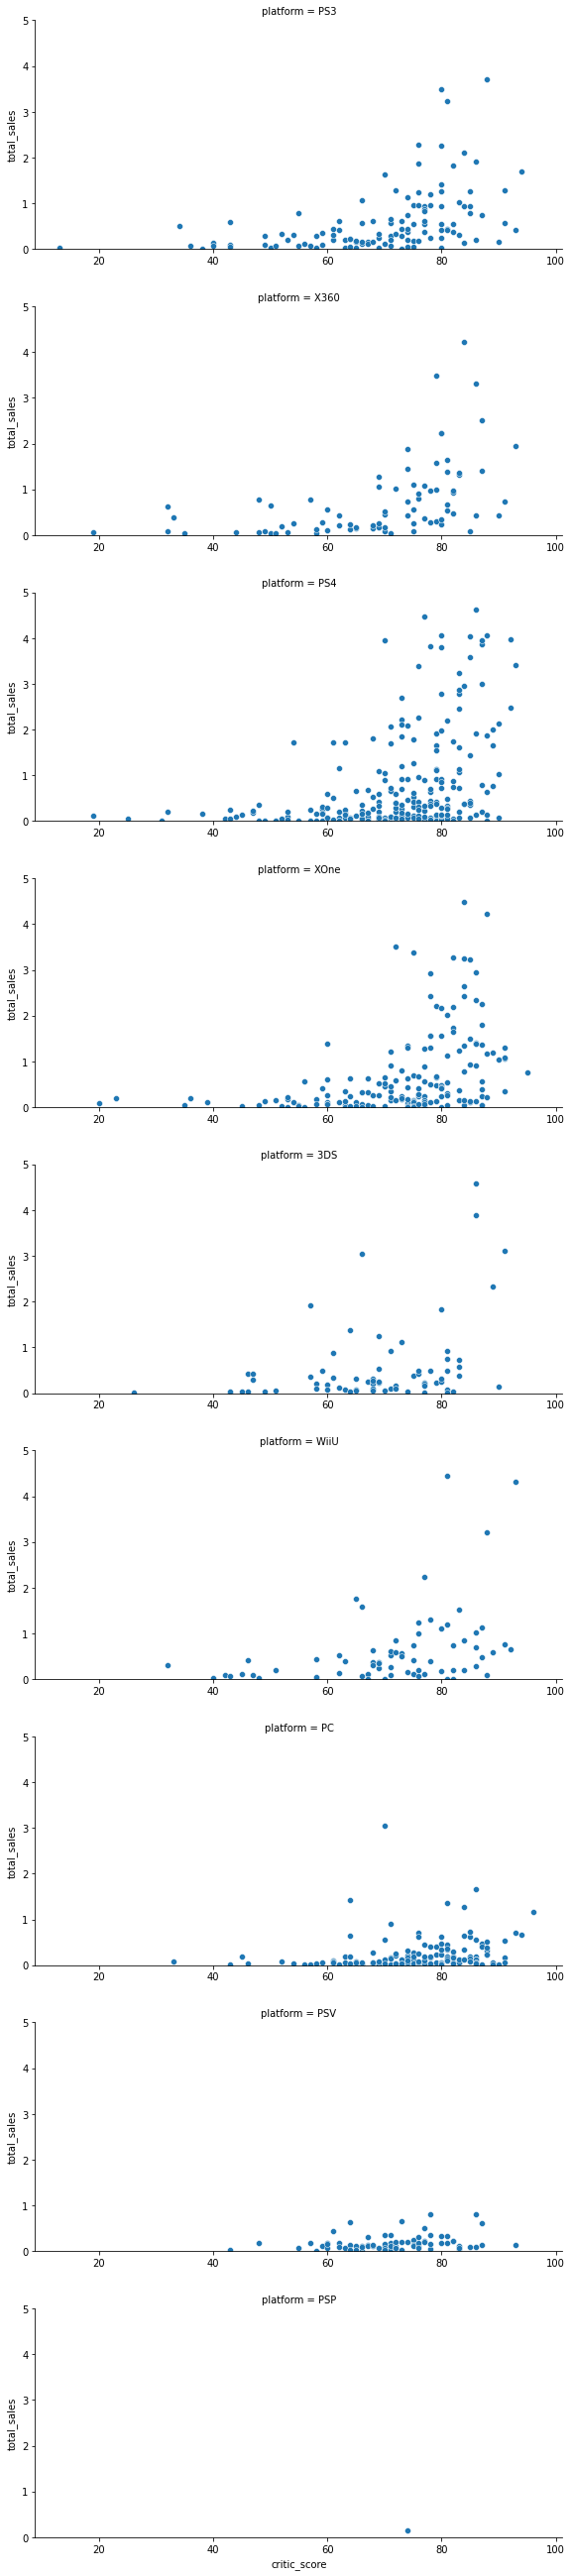

In [49]:
#Посмотрим также диаграммы рассеяния по всем платформам по оценкам критикам
fg=sns.relplot(data=data_actual[data_actual.critic_score.isna()==False].sort_values(by='critic_score'),x='critic_score',y='total_sales',height=4, aspect=2,row='platform')
fg.set(ylim=(0,5))
plt.subplots_adjust(hspace=0.25) #увеличиваем разрыв между графиками, чтобы не сливались подписи оси Х и заголовки следующего графика
for ax in fg.axes.flatten():
    ax.tick_params(labelbottom=True) #задаем подписи оси Х в каждом графике (по умолчанию выходят подписи только в конце)

В целом диаграммы по данным релизов игр для всех платформ повторяют ранее сделанные выводы - значимой зависимости объема продаж от пользовательского рейтинга нет. При этом рейтинг критиков существенно коррелирует с объемом продаж. Максимальный потенциал продаж приходится на оценку критиков в диапазоне 70-90 баллов.

<b>Доходность в разрезе жанров игр</b>

[(0.0, 2.0)]

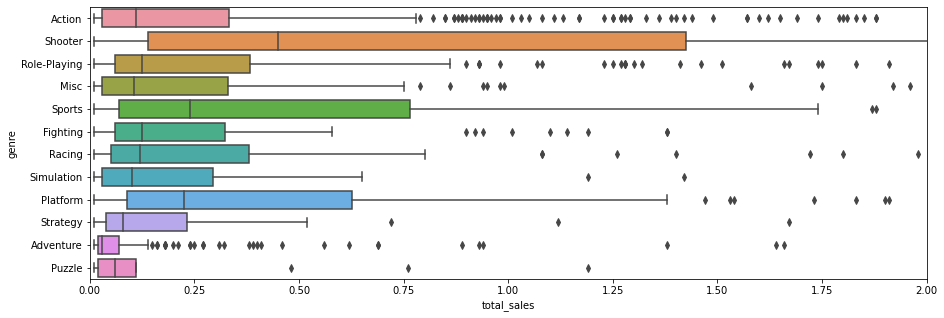

In [50]:
#Посмтроим boxplot,выведем данные только по дипазаону до 2 млн дохода с продаж
plt.figure(figsize=(15,5))
ax=sns.boxplot(y=data_actual['genre'],x=data_actual['total_sales'])
ax.set(xlim=(0,2))

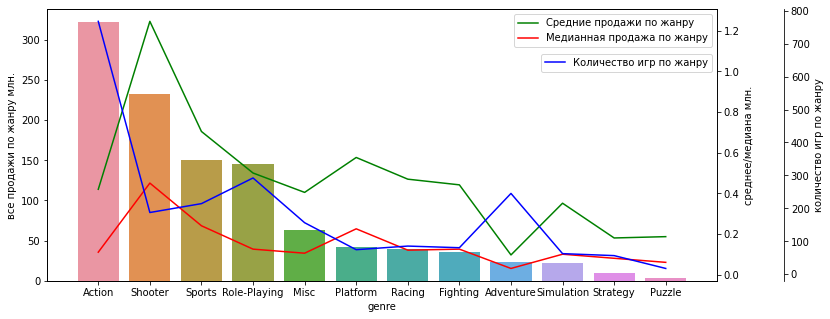

In [51]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
temp = data_actual.groupby('genre')['total_sales'].agg(['sum','mean','median','count']).reset_index().sort_values(by='sum',ascending=False)
az=sns.barplot(data=temp,x='genre',y='sum',ax=ax1)
sns.lineplot(data=temp,x='genre',y='mean',ax=ax2,color='green')
sns.lineplot(data=temp,x='genre',y='median',ax=ax2,color='red')
sns.lineplot(data=temp,x='genre',y='count',ax=ax3,color='blue')
ax1.set_ylabel('все продажи по жанру млн.')
ax2.set_ylabel('среднее/медиана млн.')
ax3.set_ylabel('количество игр по жанру')
ax2.legend(labels=['Средние продажи по жанру','Медианная продажа по жанру'])
ax3.legend(labels=['Количество игр по жанру'],loc=4,bbox_to_anchor=(1,0.75))


## Вывод по исследовательскому анализу

1. Ежегодный объем релизов игр стаблизировался после пикового значения в 2008 году.
2. Жизненный цикл игровой платформы составляет порядка 5 лет, после чего релизы новых игр фактически не появляются.
3. Наиболее популярными как по количеству игр, так и по объемам продаж являются платформы SonyPlayStation разных поколений. На текущий момент на пике популярности находится PS4 (4-е поколение). Следующими по популярности являются Nintendo DS и Sony X360.
4. Рейтинг пользователей игры существенно не влияет на показатели продаж игры, что может быть связано с тем что отзывы оставляют преимущественно именно покупатели. При этом игроки покупают игры про которые знают что они скорее всего понравятся.
5.  Рейтинг критиков наоборот существенно коррелирует с показателями продаж игр. Наибольшие продажи приходятся на игры с рейтингом 70-90 баллов.
6. Лидерами по доходу от продаж являются жанры Action и Shooter. При этом в жанре Action больше всего по рынку как сумма продаж, так и количество релизов игр, выставленных на продажу. Вторым по суммарному объему продаж следуте жанр Shooter. В котором количество релизов игр находящихся в продаже существенно меньше, но самые большие средние и медианные продажи приходящиеся на одну игру. Таким образом жанр Action представляет интерес как более емкий сегмент рынка, в жанре Shooter больше игр с высокми результатами в плане выручки от продаж.

# Составление портрета пользователя

Построим диаграммы распределения объема продаж в разбивке по регионам продаж:

Text(0.5, 1.0, 'Данные о продажах по региону Северная америка')

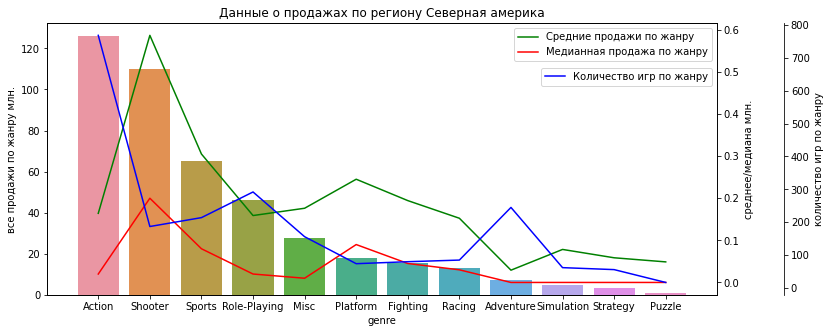

In [52]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
temp = data_actual.groupby('genre')['na_sales'].agg(['sum','mean','median','count']).reset_index().sort_values(by='sum',ascending=False)
az=sns.barplot(data=temp,x='genre',y='sum',ax=ax1)
sns.lineplot(data=temp,x='genre',y='mean',ax=ax2,color='green')
sns.lineplot(data=temp,x='genre',y='median',ax=ax2,color='red')
sns.lineplot(data=temp,x='genre',y='count',ax=ax3,color='blue')
ax1.set_ylabel('все продажи по жанру млн.')
ax2.set_ylabel('среднее/медиана млн.')
ax3.set_ylabel('количество игр по жанру')
ax2.legend(labels=['Средние продажи по жанру','Медианная продажа по жанру'])
ax3.legend(labels=['Количество игр по жанру'],loc=4,bbox_to_anchor=(1,0.75))

plt.title('Данные о продажах по региону Северная америка')

Text(0.5, 1.0, 'Данные о продажах по региону Европа')

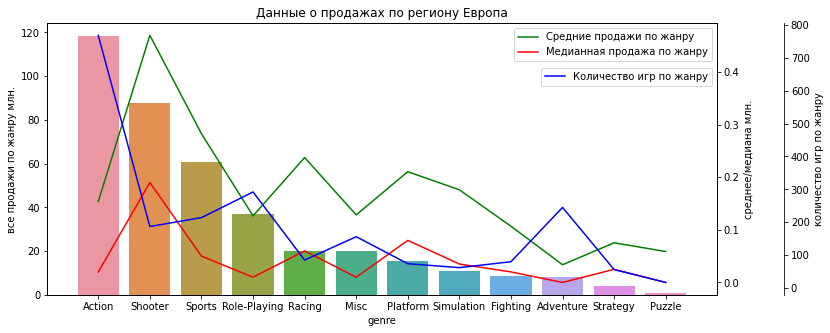

In [53]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
temp = data_actual.groupby('genre')['eu_sales'].agg(['sum','mean','median','count']).reset_index().sort_values(by='sum',ascending=False)
az=sns.barplot(data=temp,x='genre',y='sum',ax=ax1)
sns.lineplot(data=temp,x='genre',y='mean',ax=ax2,color='green')
sns.lineplot(data=temp,x='genre',y='median',ax=ax2,color='red')
sns.lineplot(data=temp,x='genre',y='count',ax=ax3,color='blue')
ax1.set_ylabel('все продажи по жанру млн.')
ax2.set_ylabel('среднее/медиана млн.')
ax3.set_ylabel('количество игр по жанру')
ax2.legend(labels=['Средние продажи по жанру','Медианная продажа по жанру'])
ax3.legend(labels=['Количество игр по жанру'],loc=4,bbox_to_anchor=(1,0.75))
plt.title('Данные о продажах по региону Европа')

Text(0.5, 1.0, 'Данные о продажах по региону Япония')

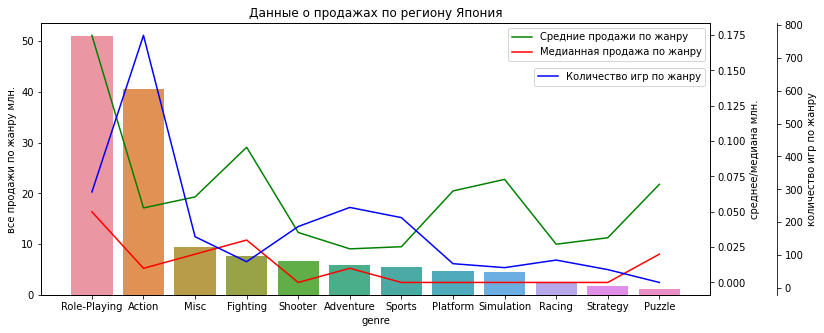

In [54]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
temp = data_actual.groupby('genre')['jp_sales'].agg(['sum','mean','median','count']).reset_index().sort_values(by='sum',ascending=False)
az=sns.barplot(data=temp,x='genre',y='sum',ax=ax1)
sns.lineplot(data=temp,x='genre',y='mean',ax=ax2,color='green')
sns.lineplot(data=temp,x='genre',y='median',ax=ax2,color='red')
sns.lineplot(data=temp,x='genre',y='count',ax=ax3,color='blue')
ax1.set_ylabel('все продажи по жанру млн.')
ax2.set_ylabel('среднее/медиана млн.')
ax3.set_ylabel('количество игр по жанру')
ax2.legend(labels=['Средние продажи по жанру','Медианная продажа по жанру'])
ax3.legend(labels=['Количество игр по жанру'],loc=4,bbox_to_anchor=(1,0.75))

plt.title('Данные о продажах по региону Япония')

Text(0.5, 1.0, 'Данные о продажах по Прочим регионам')

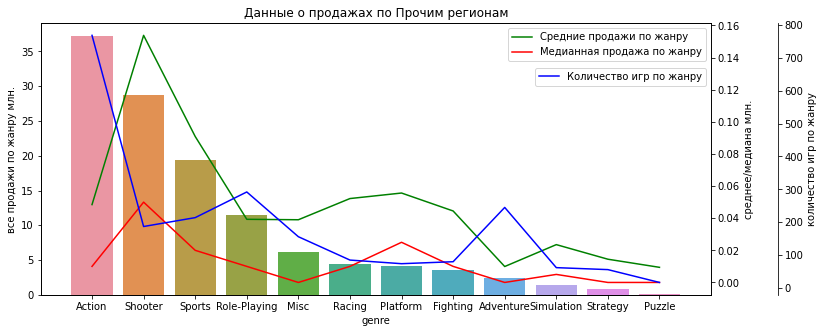

In [55]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax2=ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
temp = data_actual.groupby('genre')['other_sales'].agg(['sum','mean','median','count']).reset_index().sort_values(by='sum',ascending=False)
az=sns.barplot(data=temp,x='genre',y='sum',ax=ax1)
sns.lineplot(data=temp,x='genre',y='mean',ax=ax2,color='green')
sns.lineplot(data=temp,x='genre',y='median',ax=ax2,color='red')
sns.lineplot(data=temp,x='genre',y='count',ax=ax3,color='blue')
ax1.set_ylabel('все продажи по жанру млн.')
ax2.set_ylabel('среднее/медиана млн.')
ax3.set_ylabel('количество игр по жанру')
ax2.legend(labels=['Средние продажи по жанру','Медианная продажа по жанру'])
ax3.legend(labels=['Количество игр по жанру'],loc=4,bbox_to_anchor=(1,0.75))

plt.title('Данные о продажах по Прочим регионам')

<b>Вывод по анализу различий по регионам продаж (ТОП-5 и различие по регионам)</b>

Анализ данных по регионам продаж показывает что продажи в Северной америке, Европе и прочих регионах, за исключением Японии в целом идентичны по предпочтениям покупателей. Основные предпочтения по первым 4-м местам совпадают: Action, Shooter, Sports и Role-playing. При этом в прочих регионах в отличие от Северной америки и Европы жанр Racing уступает 5-е место жанру Misc.
Продажи покупателям из Японии существенно отличаются. В данном регионе покупатели отдают в первую очередь преимущество играм жанра Role-Playing, наиболее популярный во всех регионах Action занимает второе место, на третьем месте жанр Misc который в других регионах не входит в тройку лидеров. Жанр Fighting который не входит в других регионах в топ-5 предпочтений занимает в японии 4 место. Жанр Shooter который в остальных регионах занимает 2-е место в Японии занимает 5-е место.
Можно сделать вывод что ролевые игры посвященные единоборствам находятся в предпочтении относительно остальных рынков в связи с культурной спецификой покупателей из Японии.

<b>Анализ влияния рейтинга ESRB на продажи в отдельных регионах</b>

Рассмотрим сведения о заполненности данных по рейтингу ESRB по регионам.

In [56]:
print('Доля заполненности рейтинга ESRB по регионам исходя из доли продаж')
print('Северная Америка: доля игр без рейтинга по объему продаж - {:.0%}'.format(data_actual[data_actual.rating.isna()]['na_sales'].sum()/data_actual['na_sales'].sum()))
print('Европа:           доля игр без рейтинга по объему продаж - {:.0%}'.format(data_actual[data_actual.rating.isna()]['eu_sales'].sum()/data_actual['eu_sales'].sum()))
print('Япония:           доля игр без рейтинга по объему продаж - {:.0%}'.format(data_actual[data_actual.rating.isna()]['jp_sales'].sum()/data_actual['jp_sales'].sum()))
print('Прочие страны:    доля игр без рейтинга по объему продаж - {:.0%}'.format(data_actual[data_actual.rating.isna()]['other_sales'].sum()/data_actual['other_sales'].sum()))

Доля заполненности рейтинга ESRB по регионам исходя из доли продаж
Северная Америка: доля игр без рейтинга по объему продаж - 20%
Европа:           доля игр без рейтинга по объему продаж - 20%
Япония:           доля игр без рейтинга по объему продаж - 60%
Прочие страны:    доля игр без рейтинга по объему продаж - 20%


В целом заполненость рейтинга по регионам идентична, таким образом данные возможно использовать для сравнения регионов. Однако следует в дальнейшем учесть тот факт что по региону Япония данный параметр слабо заполнен. 
Возможно это связано с заполненностью рейтинга по самы популярным в Японии играм:

In [57]:
#Посчитаем долю незаполненных значений рейтинга по жанрам:
data_actual.groupby('genre').agg(rating_filled=('rating',lambda x: x.count()/len(x))).sort_values(by='rating_filled')

,rating_filled
genre,
Adventure,0.244898
Misc,0.410256
Strategy,0.446429
Role-Playing,0.472603
Simulation,0.500000
Action,0.548177
Puzzle,0.588235
Fighting,0.600000
Sports,0.785047


Очевидные причины для существенной разницы в заполненности рейтинга по странам отсутствуют. Возможно причина в существенном объеме продаж в Японии по играм с незаполненным ретингом:

In [58]:
jp_total = data_actual['jp_sales'].sum()
print(jp_total)
data_actual[data_actual.rating.isna()].sort_values(by='jp_sales',ascending=False).assign(japan_share=data_actual['jp_sales']/jp_total*100).head(20)

141.02000000000004


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,japan_share
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,3.084669
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN,3.44,2.439370
412,Yokai Watch 2 Ganso/Honke,3DS,2014.0,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,NaN,3.28,2.254999
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,2.198270
406,Monster Hunter X,3DS,2015.0,Action,0.27,0.21,2.79,0.05,NaN,NaN,NaN,3.32,1.978443
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,NaN,2.68,1.900440
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55,1.723160
694,Yokai Watch Busters,3DS,2015.0,Action,0.00,0.00,2.29,0.00,NaN,NaN,NaN,2.29,1.623883
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14,1.602610
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22,1.347327


Игры с незаполненным рейтингом преимущественно встречаются в жанре Role-Playing, наиболее популярном в Японии. При этом в лидерах по продажам игры на платформе 3ds (by Nintendo):

In [59]:
#Посчитаем долю незаполненных значений рейтинга по платформам:
data_actual.groupby('platform').agg(rating_filled=('rating',lambda x: x.count()/len(x))).sort_values(by='rating_filled')

,rating_filled
platform,
PSP,0.044118
PSV,0.298883
3DS,0.343234
PS3,0.579710
PS4,0.650510
WiiU,0.739130
PC,0.743455
DS,0.750000
XOne,0.753036


Не смотря на то что 3DS не является самой популярной платформой, она популярна в Японии и по данной платформе слабо заполнены значения рейтинга. В целом рейтинг очевидно и существенно слабее заполнен по мобильным платформам. По данным платформам очевидно отсутствует налаженный способ сбора информации.
Построим однако диаграмму рассейяния для анализа зависимости продаж в отдельных регионах от рейтинга. При этом предлагается пустые значения рейтинга заполнить текстовым тегом N/D (no data):

In [60]:
data_actual.loc[data.rating.isna(),'rating']='N/D'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


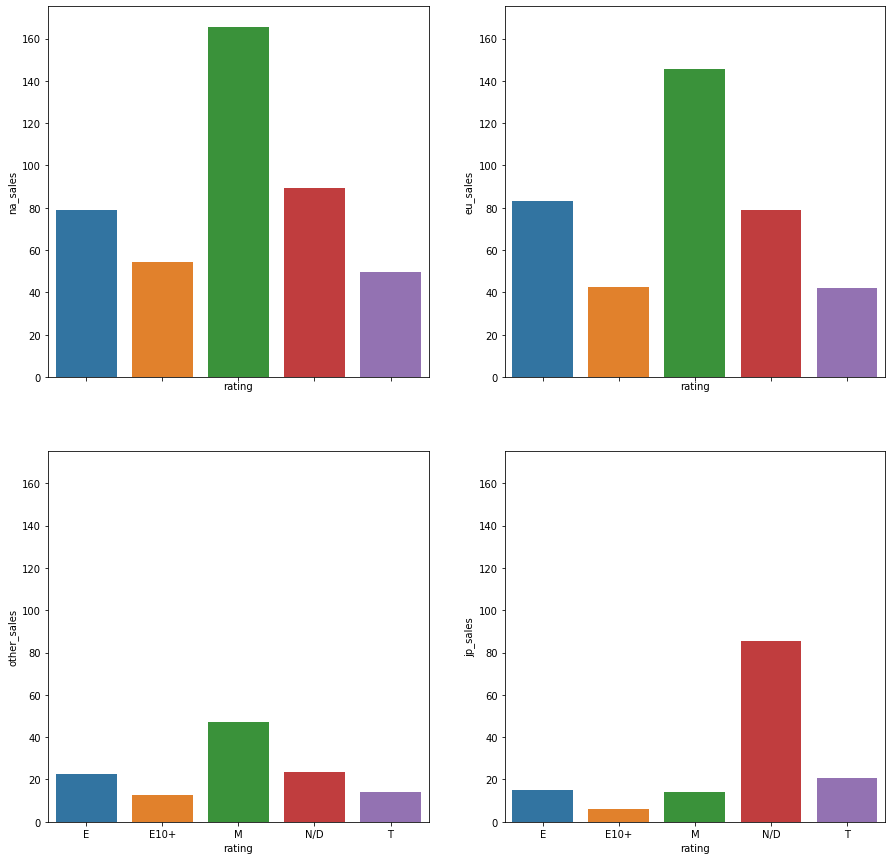

In [61]:
#Посмотрим сведения о продажах по всем платформам в разбивке по рейтингу. 

fig, axes = plt.subplots(2,2,sharex=True,figsize=(15,15))
regions = ('na_sales', 'eu_sales', 'other_sales', 'jp_sales')
#Посчитаем максимальное значение для "среднего" значения продаж
ylim_max=round((data_actual.groupby('rating').sum())[['na_sales', 'eu_sales', 'other_sales', 'jp_sales']].max().max(),1)+10
#print(ylim_max)

for i in range(0,4):
    fg=sns.barplot(x='rating',y=regions[i],data=data_actual.groupby('rating').sum().sort_values(by='rating').reset_index(),ax=axes[i//2,i%2])
    fg.set(ylim=(0,ylim_max))

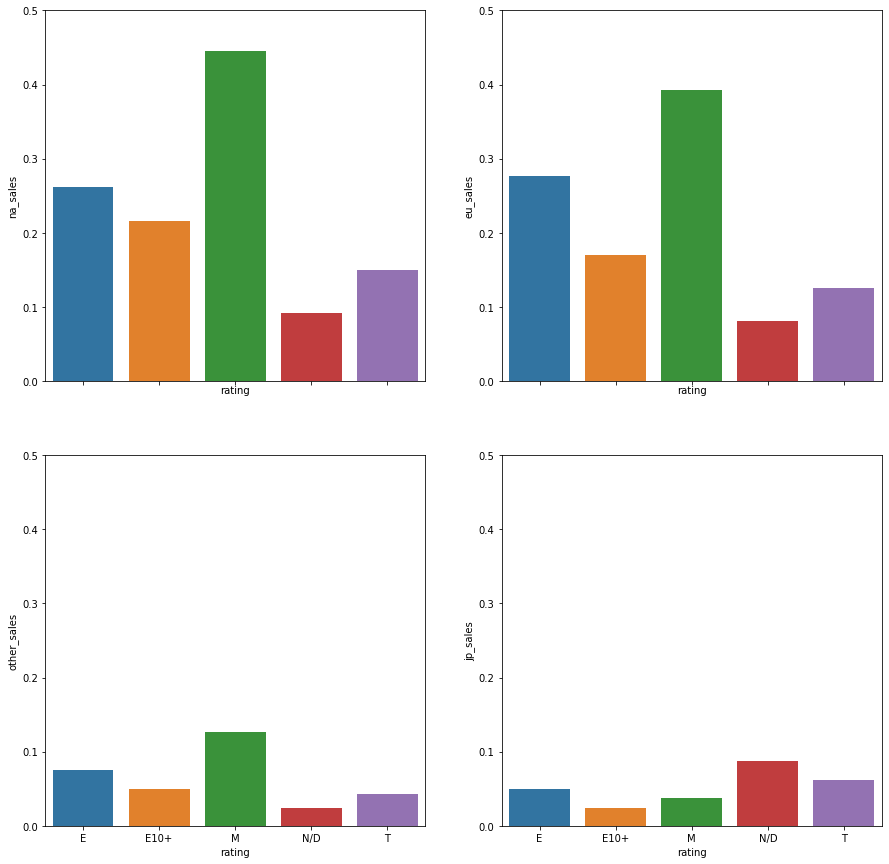

In [62]:
#Посмотрим сведения о продажах по всем платформам в разбивке по рейтингу. 
#Выведем средний объем продаж по каждому рейтингу и сравним данные по регионам:
fig, axes = plt.subplots(2,2,sharex=True,figsize=(15,15))
regions = ('na_sales', 'eu_sales', 'other_sales', 'jp_sales')
#Посчитаем максимальное значение для "среднего" значения продаж
ylim_max=round((data_actual.groupby('rating').mean())[['na_sales', 'eu_sales', 'other_sales', 'jp_sales']].max().max(),1)+0.1
#print(ylim_max)

for i in range(0,4):
    fg=sns.barplot(x='rating',y=regions[i],data=data_actual.groupby('rating').mean().sort_values(by='rating').reset_index(),ax=axes[i//2,i%2])
    fg.set(ylim=(0,ylim_max))

Анализ данных о выручке от продажи игр в разрезе регионов продажи и рейтинга показывает что по всем регионам, за исключением Японии, лучшие продажи отмечены по играм с рейтингом M (для взрослых старше 17 лет) и E (для всех, семейный вариант), худшие по играм с рейтингом E10+ (детям старше 10 лет) и T (тинейджеры). Возможно это связано с тем что игры адаптированные для детей не так интересны взрослым и не продаются в высокой ценовой категории.
Данные по Японии показывают больший объем продаж (в среднем) по играм с рейтингом T (тинейджеры) и E (для всех). Что может быть связано с локальными культурными особенностями, например несоответствия рейтинга локальным представлениям о "детских играх", а также больших затратах на электронные игры среди подростков в Японии по сравнению с другими регионами.
Также существенное отличие может быть связано с большим спросом на игры, которым рейтинг не присвоен.


Посмотрим струтуру продаж игр "без рейтинга ESRB" в разрезе жанров и платформ:

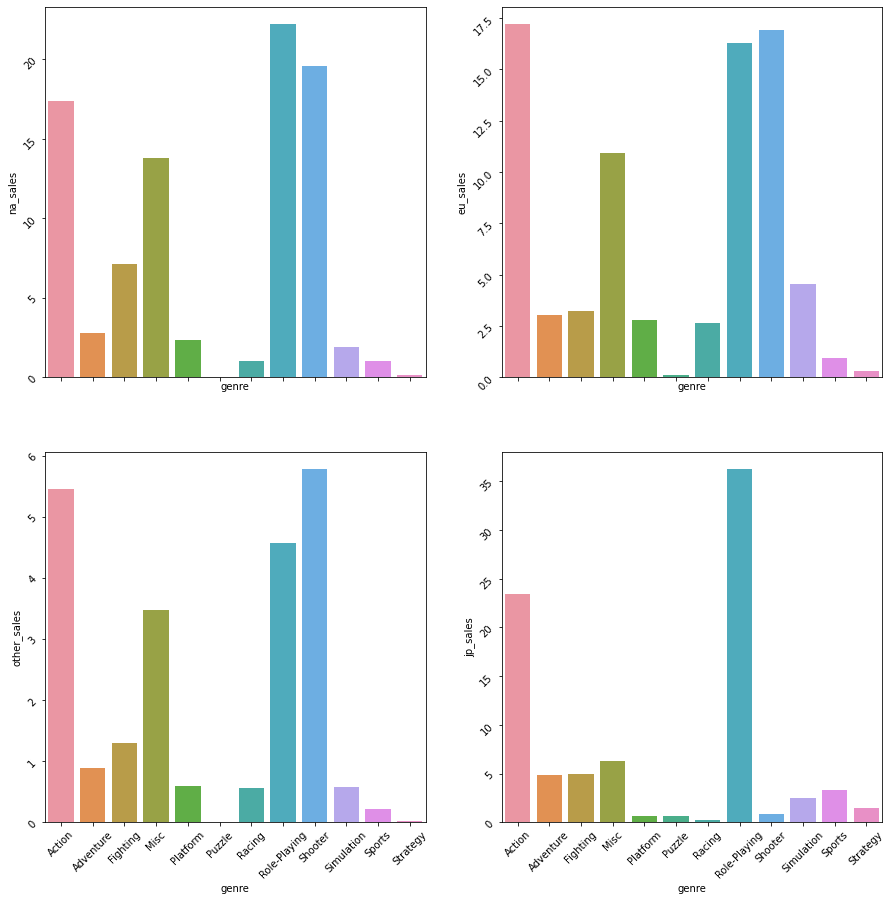

In [63]:
fig, axes = plt.subplots(2,2,sharex=True,figsize=(15,15))
regions = ('na_sales', 'eu_sales', 'other_sales', 'jp_sales')
#Посчитаем максимальное значение для "среднего" значения продаж
#ylim_max=round((data_actual[data_actual.rating=='N/D'].groupby('genre').sum())[['na_sales', 'eu_sales', 'other_sales', 'jp_sales']].max().max(),1)+1
#print(ylim_max)
for i in range(0,4):
    axes[i//2,i%2].tick_params(rotation=45)
    fg=sns.barplot(x='genre',y=regions[i],data=data_actual[data_actual.rating=='N/D'].groupby('genre').sum().sort_values(by='genre').reset_index(),ax=axes[i//2,i%2])
#    fg.set(ylim=(0,ylim_max))

Основные продажи игр "без рейтинга" приходятся на игры Shooter, Action и Role_playing, при этом в Японии структура отличается и значимыми являются продажи Role_Playing и Action.
Посмотрим структуру рейтингов в целом по данным жанрам игр:

In [64]:
data_actual[data_actual.genre.isin(('Action','Role-Playing','Shooter'))].groupby('rating').sum().reset_index()

,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,E,106766.0,6.17,5.54,3.60,1.10,2077.0,243.1,16.41
1,E10+,255846.0,25.36,21.86,3.71,6.04,5798.0,763.8,56.97
2,M,672774.0,158.95,140.54,13.49,45.17,21479.0,2172.7,358.15
3,N/D,1061715.0,59.08,50.35,60.46,15.82,858.0,119.9,185.71
4,T,415001.0,32.65,24.90,16.88,9.35,11394.0,1364.9,83.78


Рапределение по рейтингам сумм продаж


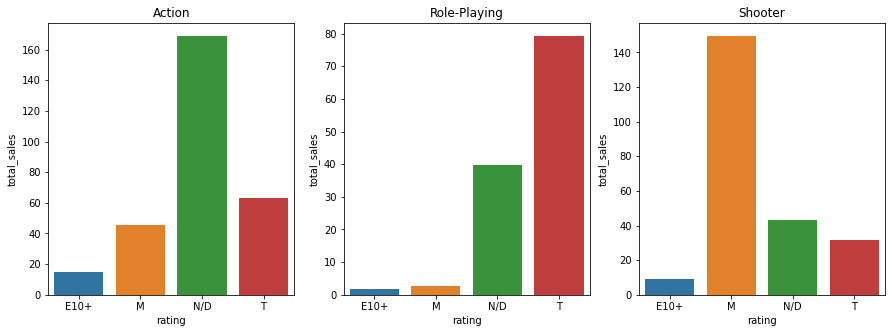

Рапределение по рейтингам средних продаж


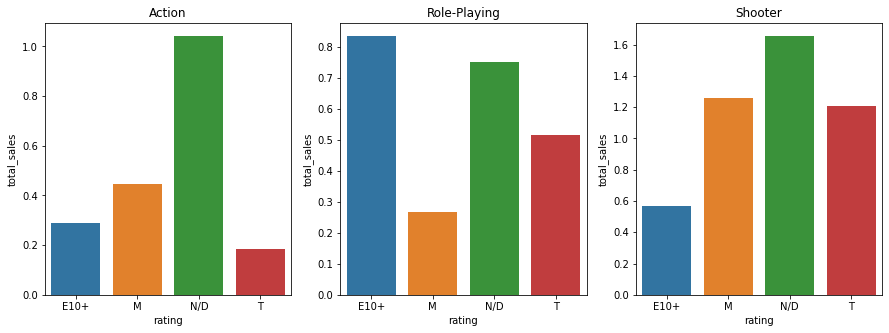

In [65]:
fig, axes = plt.subplots(1,3,sharex=True,figsize=(15,5))
list_genres = ('Action','Role-Playing','Shooter')
print('Рапределение по рейтингам сумм продаж')
for i in range(0,3):
    sns.barplot(x='rating',y='total_sales',data=data_actual[data_actual.genre==list_genres[i]].groupby('rating').sum().reset_index(),ax=axes[i]).set_title(list_genres[i])
plt.show()
fig, axes = plt.subplots(1,3,sharex=True,figsize=(15,5))
print('Рапределение по рейтингам средних продаж')
for i in range(0,3):
    sns.barplot(x='rating',y='total_sales',data=data_actual[data_actual.genre==list_genres[i]].groupby('rating').mean().reset_index(),ax=axes[i]).set_title(list_genres[i])
plt.show()

Очевидно что по жанру Shooter возможно отнесение игр без рейтинга к жанру M, по жанру Role-Playinig к жанру Т. При этом игры жанра Action не возможно однозначно распределить по жанрам, но предположительно их возможно отнести примерно поровну к рейтингам М и Т (с учетом что рейтинг Е10+ практически равен рейтингу Т).

In [66]:
data_actual.loc[((data_actual.rating=='N/D')&(data_actual.genre=='Shooter')),'rating']='M'
data_actual.loc[((data_actual.rating=='N/D')&(data_actual.genre=='Role-Playing')),'rating']='T'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


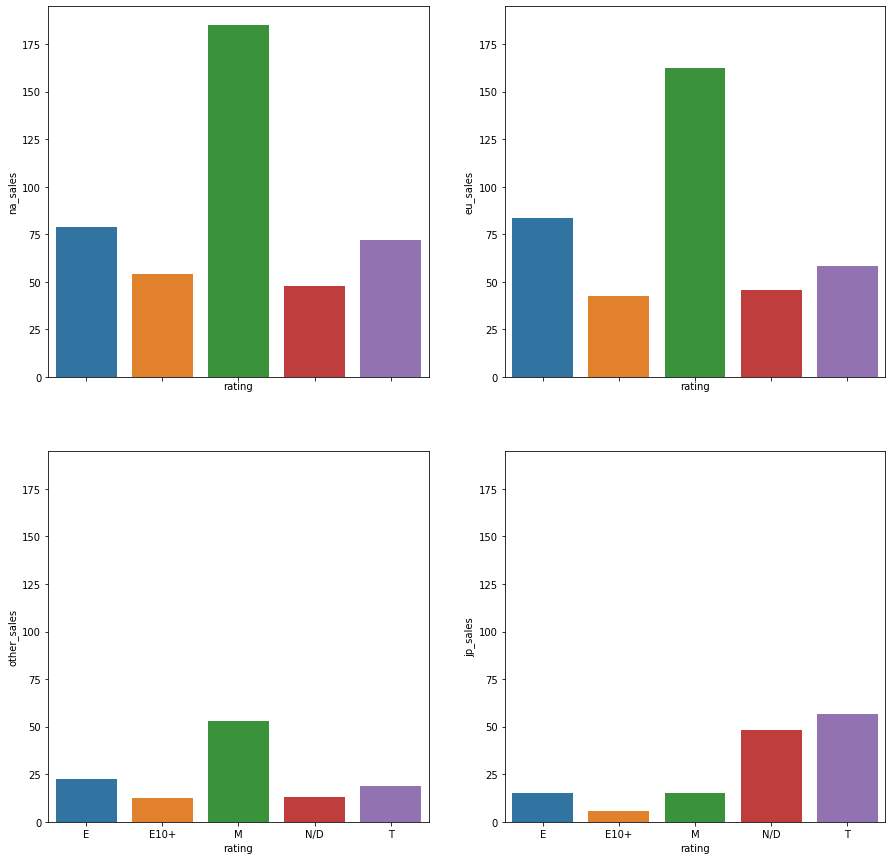

In [67]:
#Повторно выведем сведения о продажах по всем платформам в разбивке по рейтингу. 

fig, axes = plt.subplots(2,2,sharex=True,figsize=(15,15))
regions = ('na_sales', 'eu_sales', 'other_sales', 'jp_sales')
#Посчитаем максимальное значение для "среднего" значения продаж
ylim_max=round((data_actual.groupby('rating').sum())[['na_sales', 'eu_sales', 'other_sales', 'jp_sales']].max().max(),1)+10
#print(ylim_max)

for i in range(0,4):
    fg=sns.barplot(x='rating',y=regions[i],data=data_actual.groupby('rating').sum().sort_values(by='rating').reset_index(),ax=axes[i//2,i%2])
    fg.set(ylim=(0,ylim_max))

По прежнему существенная доля игр без рейтинга отражается в Японии. Посмотрим на игры которые продаются только в Японии

In [68]:
data_actual[(data_actual.rating=='N/D')&(data_actual.jp_sales==data_actual.total_sales)].sort_values(by='jp_sales',ascending=False).head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
694,Yokai Watch Busters,3DS,2015.0,Action,0.0,0.0,2.29,0.0,NaN,NaN,N/D,2.29
1466,Yokai Watch 3,3DS,2016.0,Action,0.0,0.0,1.33,0.0,NaN,NaN,N/D,1.33
2387,Monster Strike 3DS,3DS,2015.0,Action,0.0,0.0,0.87,0.0,NaN,NaN,N/D,0.87
3593,Yokai Sangokushi,3DS,2016.0,Action,0.0,0.0,0.56,0.0,NaN,NaN,N/D,0.56
4016,Dragon Quest Heroes: The World's Tree Woe and ...,PS3,2015.0,Action,0.0,0.0,0.49,0.0,NaN,NaN,N/D,0.49
4999,Phoenix Wright: Ace Attorney - Dual Destinies,3DS,2013.0,Adventure,0.0,0.0,0.38,0.0,NaN,NaN,N/D,0.38
5052,Mobile Suit Gundam: Extreme VS Full Boost,PS3,2014.0,Fighting,0.0,0.0,0.38,0.0,NaN,NaN,N/D,0.38
5263,Sentouchu: Densetsu no Shinobi to Survival Bat...,3DS,2013.0,Action,0.0,0.0,0.35,0.0,NaN,NaN,N/D,0.35
5589,Dragon Ball Heroes: Ultimate Mission 2,3DS,2014.0,Strategy,0.0,0.0,0.32,0.0,NaN,NaN,N/D,0.32
5731,Taiko Drum Master: Don and Katsu's Space-Time ...,3DS,2014.0,Action,0.0,0.0,0.31,0.0,NaN,NaN,N/D,0.31


Исходя из описания игр, а также игровой платформы (краманная приставка 3DS). Большинство безрейтинговых игр в Японии приходится на игры для тинейджеров. В нашем случае это Т. Присвоим в рамках проекта для игр на данной консоли и без рейтинга - рейтинг Т

In [69]:
data_actual.loc[((data_actual.rating=='N/D')&(data_actual.platform=='3DS')),'rating']='T'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


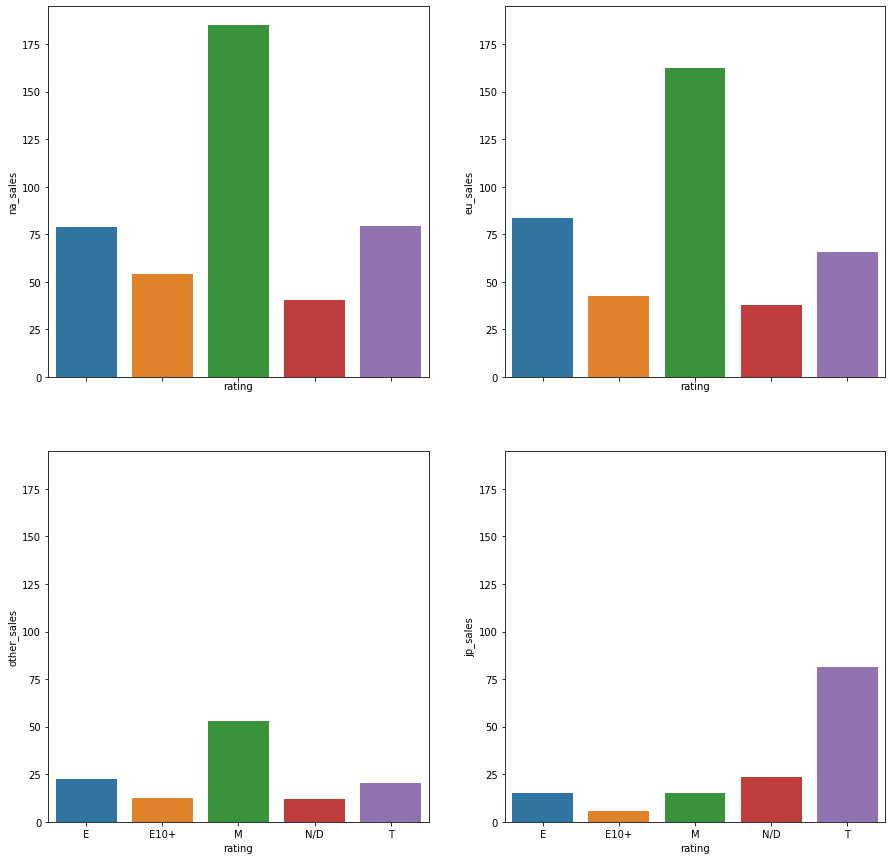

In [70]:
#Повторно выведем сведения о продажах по всем платформам в разбивке по рейтингу. 

fig, axes = plt.subplots(2,2,sharex=True,figsize=(15,15))
regions = ('na_sales', 'eu_sales', 'other_sales', 'jp_sales')
#Посчитаем максимальное значение для "среднего" значения продаж
ylim_max=round((data_actual.groupby('rating').sum())[['na_sales', 'eu_sales', 'other_sales', 'jp_sales']].max().max(),1)+10
#print(ylim_max)

for i in range(0,4):
    fg=sns.barplot(x='rating',y=regions[i],data=data_actual.groupby('rating').sum().sort_values(by='rating').reset_index(),ax=axes[i//2,i%2])
    fg.set(ylim=(0,ylim_max))

## Вывод по портрету пользователя

1. За исключением региона Япония предпочтения игроков существенно не различаются. Предпочтение отдается играм жанров Action, Shooter, Role-Playing, Sports, Misc. Последний это игры фактически без опредленного жанра, т.о. в целом по мировой статистике значительная часть игр некатегорирована.
2. Европейские покупатели больше остальных интересуются автосимуляторами, которые потеснили в Европе на пятом месте жанр Misc 
3. Существенно отличаются Японские покупатели. Основные продажи приходятся на игры жанра Role-Playing. В Топ-5 также вошли игры жанра Fighting что возможно связано с большим интересом к боевым искусствам чем в целом по миру.
4. Рейтинг игр по возрастному ограничению показывает что основные продажи приходятся на игры для взрослой аудитории (рейтинг М), а также игры для тинейджеров (рейтинг Т). Что может быть свзяано с покупательской способностью. Преимущественно игры покупают взрослые игроки, либо дети постарше, которым предоставляют деньги родители.
5. Возрастной рейтинг по продажам в Японии показывает существенные отличия. В абсолютных лидерах игры для тинейджеров (рейтинг -Т). Что может быть связано с тем что наибольший интерес к покупке игр проявляют подростки, которые к тому же располагают для этого достаточными средствами.
6. По региону Япония существенная доля продаж приходится на игры без возрастного рейтинга, что может быть связано со спецификой продаваемых игр, отсутствия их в широкой продаже в регионе "Северная америка", в котором и осуществляется категорирование игр по возрастным ограничениям.
7. Проведено частичное заполнение значений рейтинга "по аналогии" которое подтвердило данные выводы. Имеется значительная часть игр жанра Action без установления рейтинга, однако потенциально данный жанр рапределится между ретйингами М и Т и таким образом общие выводы подтвердятся.

# Проверка гипотез

### п.1 Гипотеза - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

In [71]:
from scipy import stats as st
alpha = 0.05
print('Количество игр на платформе Xbox One с пользовательским рейтингом =', data_actual[data_actual.platform=='XOne']['user_score'].count())
print('Количество игр на платформе PC с пользовательским рейтингом =', data_actual[data_actual.platform=='PC']['user_score'].count())
print('Значение дисперсии для рейтингов игр на платформах Xbox One и PC составило соответственно -',round(np.var(data_actual[data_actual['platform']=='XOne']['user_score']),2),round(np.var(data_actual[data_actual['platform']=='PC']['user_score']),2))

Количество игр на платформе Xbox One с пользовательским рейтингом = 182
Количество игр на платформе PC с пользовательским рейтингом = 157
Значение дисперсии для рейтингов игр на платформах Xbox One и PC составило соответственно - 1.9 2.98


Размер имеющихся данных по указанным пользовательским рейтингам и значения дисперсий позволяет провести ttest с условием сопоставимости выборок (выборка = все данные).
Определим гипотезу Н0 как равенство средних пользовательских рейтингов платформ. Н1 как несоответствие таких значений.
Определим порог alpha = 0,05. Применим метод scipy.st.ttest_ind. Случае если pvalue превысит порог alpha, вероятность получить равные значения средних рейтингов достаточно чтобы отвергнуть гипотезу Н1 и принять начальную.

In [72]:
results = st.ttest_ind(data_actual[(data_actual.platform=='XOne')&(data_actual.user_score.isna()==False)]['user_score'],data_actual[(data_actual.platform=='PC')&(data_actual.user_score.isna()==False)]['user_score']).pvalue

In [73]:
if results > alpha:
    print('Значение pvalue превысило порог alpha и составило', results, 'соответственно отвергаем альтернативную гипотезу,')
    print('и принимаем нулевую гипотезу о равенстве средних рейтингов.')
else:
    print('Значение pvalue не превысило порог alpha и составило', results, 'соответственно принимаем альтернативную гипотезу,')
    print('и отвергаем нулевую гипотезу о равенстве средних рейтингов.')
    

Значение pvalue превысило порог alpha и составило 0.13235357785478058 соответственно отвергаем альтернативную гипотезу,
и принимаем нулевую гипотезу о равенстве средних рейтингов.


### п.2 Гипотеза - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

In [74]:
alpha = 0.05
print('Количество игр в жанре Action с пользовательским рейтингом =', data_actual[data_actual.genre=='Action']['user_score'].count())
print('Количество игр в жанре Sports с пользовательским рейтингом =', data_actual[data_actual.genre=='Sports']['user_score'].count())
print('Значение дисперсии для рейтингов игр в жанрах Action и Sports составило соответственно -',round(np.var(data_actual[data_actual.genre=='Action']['user_score']),2),round(np.var(data_actual[data_actual.genre=='Sports']['user_score']),2))

Количество игр в жанре Action с пользовательским рейтингом = 391
Количество игр в жанре Sports с пользовательским рейтингом = 160
Значение дисперсии для рейтингов игр в жанрах Action и Sports составило соответственно - 1.76 3.16


Размер имеющихся данных по указанным пользовательским рейтингам и значения дисперсий не позволяет провести ttest с условием сопоставимости выборок (выборка = все данные), equal_var принимаем как False.
Определим гипотезу Н0 как разность средних пользовательских рейтингов платформ. Н1 как соответствие таких значений.
Определим порог alpha = 0,05. Применим метод scipy.st.ttest_ind. Случае если pvalue превысит порог alpha, вероятность получить равные значения средних рейтингов достаточно чтобы отвергнуть начальную гипотезу Н0 и принять альтернативную о равенстве указанных рейтингов.

In [75]:
results = st.ttest_ind(data_actual[(data_actual.genre=='Action')&(data_actual.user_score.isna()==False)]['user_score'],data_actual[(data_actual.genre=='Sports')&(data_actual.user_score.isna()==False)]['user_score'], equal_var=False).pvalue

In [76]:
if results > alpha:
    print('Значение pvalue превысило порог alpha и составило', results, 'соответственно принимаем альтернативную гипотезу,')
    print('и отвергаем нулевую гипотезу о несоответствии средних рейтингов.')
else:
    print('Значение pvalue не превысило порог alpha и составило', results, 'соответственно отвергаем альтернативную гипотезу,')
    print('и принимаем нулевую гипотезу о несоответствии средних рейтингов.')

Значение pvalue не превысило порог alpha и составило 1.6948835429264077e-20 соответственно отвергаем альтернативную гипотезу,
и принимаем нулевую гипотезу о несоответствии средних рейтингов.


# Выводы

1. Жизненный цикл игровой платформы порядка 5 лет, после чего появляется новая платформа того же производителя. Новые игры уже не выпускаются. В связи с этим основными актуальными платформами являются (по убыванию): PlayStation 4, Nintendo DS, Sony X360. Далее идут предыдущие поколения этих платформ и другие платформы. Таким образом целесообразна работа с аудиторией указанных 3 наиболее популярных платформ, что возможно дополнительным эффектом привлечет аудиторию предыдущих версий данных платформ.
2. Рейтинг пользователей слабо характеризует продажи игры. При этом рейтинг критиков (в диапазоне 70-90 баллов) можно использовать для предположения об успешных продажах.
3. Игры жанра Action пользуются существенным спросом и формируют самые большие продажи среди всех жанров, однако продвижение отдельных игр данного жанра может быть нецелесообазно, т.к. средние продажи на игру невелики, игр представлено много. По данному жанру целесообразно наличие широкого ассортимента. Возможно при планировании рекламы целесообразно сконцентирорвоаться на рекламе отсылающая в целом к жанру а не к конкретной игре.
4. Игры жанра Shooter также пользуются существенным спросом, при этом средние продажи по отдельным играм максимальные среди всех жанров. Возможно целесообразна реклама с отсылкой/привязкой к конкретным релизам.
5. Среди регионов продаж выделяется Япония. По данному региону покупателей максимально интересуют Role-play игры и Action. По данному региону целесообразно индивидуальное формирование рекламной кампании и ассортимента.
6. Игры с возрастным рейтингом М (для взрослых) и Т (для подростков) дают максимальные объемы продаж. При этом для регоина Япония также следует индивидуализировать рекламу и ассортимент, так как в абсолютных лидерах по данному региону игры с рейтингом Т (для подростков).
7. Проведено частичное заполнение значений рейтинга "по аналогии", при наличии такой возможности которое подтвердило данные выводы. Имеется значительная часть игр жанра Action без установления рейтинга, однако потенциально данный жанр рапределится между рейтингами М и Т и таким образом общие выводы должны будут подтвердиться.
7. Гипотеза о том что Средние пользовательские рейтинги Хbox One и PC совпадают подтвердилась. Гипотеза о том что средние пользовательские рейтинги жанров Action и Sports не совпадают также подтвердилась.
